In [1]:
import os
import chardet
import numpy as np
import pandas as pd
import joblib

In [2]:
%precision 3
pd.options.display.precision = 3

In [3]:
from scipy import stats
import pingouin as pg

In [4]:
from GraphicSetting import *
import HelloDataScience as hds

In [5]:
os.getcwd()

'C:\\Users\\hdsce\\Documents\\HarimExpert\\live'

In [6]:
os.chdir('../data')

In [7]:
os.listdir()

['KBO_Hitter_2021.z',
 'Used_Cars_Price.csv',
 'Used_Cars_Price.xlsx',
 'Used_Cars_Price_Prep.z',
 'Used_Cars_Prics.z']

In [8]:
df = joblib.load('Used_Cars_Price_Prep.z')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     1251 non-null   int64 
 1   Age       1251 non-null   int64 
 2   KM        1251 non-null   int64 
 3   FuelType  1251 non-null   object
 4   HP        1251 non-null   int64 
 5   MetColor  1251 non-null   object
 6   Doors     1251 non-null   int64 
 7   Weight    1251 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 78.3+ KB


In [10]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Doors,Weight
0,13500,23,46986,Diesel,90,1,3,1165
1,13750,23,72937,Diesel,90,1,3,1165
2,13950,24,41711,Diesel,90,1,3,1165
3,14950,26,48000,Diesel,90,0,3,1165
4,13750,30,38500,Diesel,90,0,3,1170


In [11]:
df.tail()

,Price,Age,KM,FuelType,HP,MetColor,Doors,Weight
1246,15950,25,25000,Petrol,97,0,3,1100
1247,15500,25,49163,Petrol,110,0,5,1165
1248,15950,25,29719,Petrol,97,1,5,1110
1249,15950,19,51884,Petrol,97,1,3,1100
1250,15950,20,36000,Petrol,110,1,5,1075


In [12]:
df.insert(loc = 1, column = 'const', value = 1)

In [13]:
df = pd.get_dummies(data = df, columns = ['FuelType'], drop_first = True)

In [14]:
df

,Price,const,Age,KM,HP,MetColor,Doors,Weight,FuelType_Petrol
0,13500,1,23,46986,90,1,3,1165,0
1,13750,1,23,72937,90,1,3,1165,0
2,13950,1,24,41711,90,1,3,1165,0
3,14950,1,26,48000,90,0,3,1165,0
4,13750,1,30,38500,90,0,3,1170,0
...,...,...,...,...,...,...,...,...,...
1246,15950,1,25,25000,97,0,3,1100,1
1247,15500,1,25,49163,110,0,5,1165,1
1248,15950,1,25,29719,97,1,5,1110,1
1249,15950,1,19,51884,97,1,3,1100,1


In [15]:
df = df.rename(columns = {'FuelType_Petrol': 'Petrol'})

In [16]:
df.dtypes

Price        int64
const        int64
Age          int64
KM           int64
HP           int64
MetColor    object
Doors        int64
Weight       int64
Petrol       uint8
dtype: object

In [17]:
cols = ['MetColor']

In [18]:
df[cols] = df[cols].astype(np.uint8)

In [19]:
df.dtypes

Price       int64
const       int64
Age         int64
KM          int64
HP          int64
MetColor    uint8
Doors       int64
Weight      int64
Petrol      uint8
dtype: object

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
trSet, teSet = train_test_split(df, test_size = 0.3, random_state = 0)

In [22]:
trSet['Price'].mean()

9732.848

In [23]:
teSet['Price'].mean()

9625.545

In [24]:
yvar = 'Price'

In [25]:
trReal = trSet[yvar].copy()
trSetX = trSet.drop(columns = yvar)

In [26]:
teReal = teSet[yvar].copy()
teSetX = teSet.drop(columns = yvar)

In [27]:
import statsmodels.api as sa

In [28]:
def ols(y, X):
    model = sa.OLS(endog = y, exog = X)
    return model.fit()

In [29]:
fit1 = ols(y = trReal, X = trSetX)

In [30]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     339.3
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          2.57e-243
Time:                        10:16:05   Log-Likelihood:                -7326.4
No. Observations:                 875   AIC:                         1.467e+04
Df Residuals:                     867   BIC:                         1.471e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4832.6730   2260.499     -2.138      0.033   -9269.362    -395.984
Age          -94.4704      2.961    -31.902      0.000    -100.283     -88.658
KM            -0.0170      0.001    -12.892      0.000      -0.020      -0.014
HP             2.2961      4.971      0.462      0.644      -7.460      12.052
MetColor      14.4447     75.854      0.190      0.849    -134.434     163.324
Doors         -5.0942     46.181     -0.110      0.912     -95.733      85.545
Weight        18.9523      2.256      8.401      0.000      14.524      23.380
Petrol      1283.4546    325.808      3.939      0.000     643.990    1922.919
==============================================================================
Omnibus:                       54.450   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.503
Skew:                          -0.314   Prob(JB):                     3.09e-31
Kurtosis:                       4.860   Cond. No.                     5.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
hds.breushpagan(model = fit1)

,Statistic,P-Value,F-Value,F P-Value
0,62.997,3.794e-11,9.609,1.526e-11


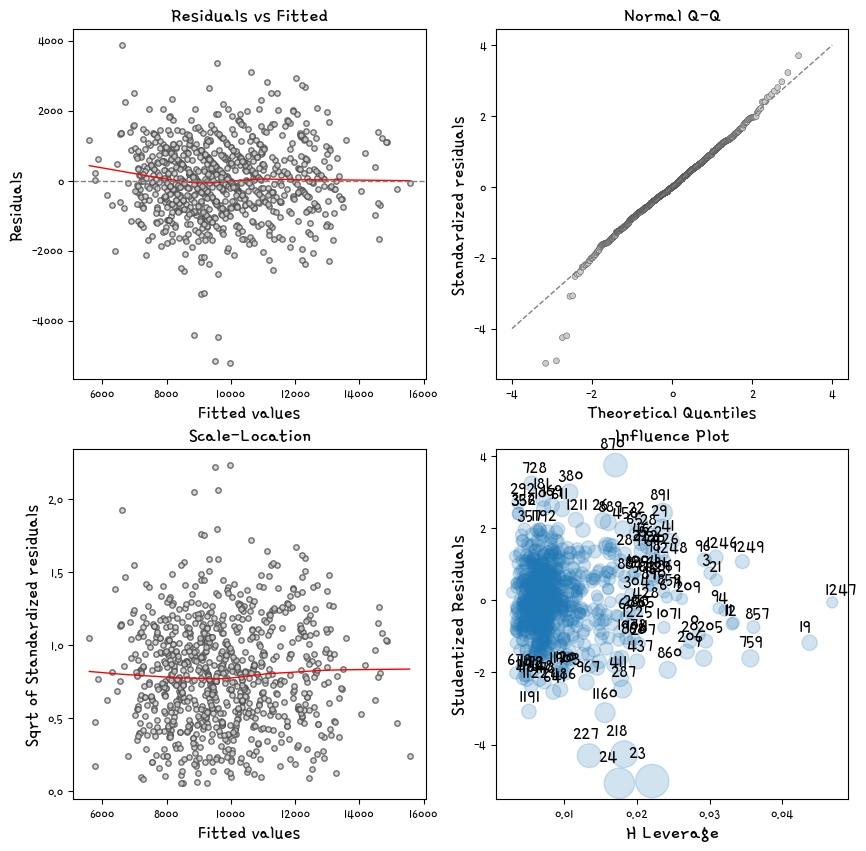

In [32]:
hds.regressionDiagnosis(model = fit1)

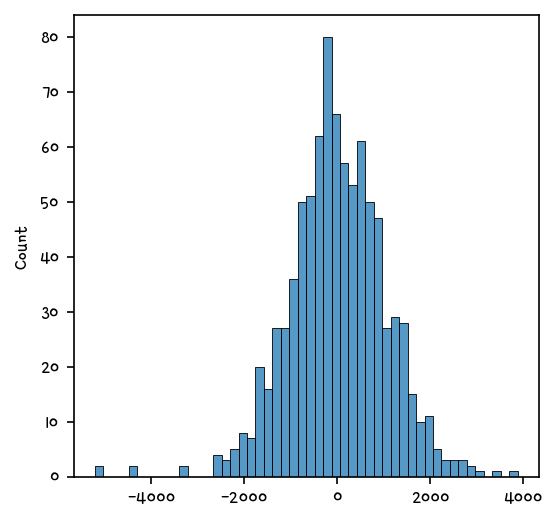

In [33]:
sns.histplot(x = fit1.resid, bins = 50);

In [34]:
stats.shapiro(fit1.resid)

ShapiroResult(statistic=0.9833132028579712, pvalue=1.928031068132441e-08)

In [35]:
aug = hds.augment(fit1)

In [36]:
aug

,Price,fitted,resid,hat,sigma,cooksd,std_resid
1116,9950,8212.688,1737.312,0.009,1051.128,3.099e-03,1.659
65,13950,12045.570,1904.430,0.020,1050.768,8.552e-03,1.828
412,9950,10436.103,-486.103,0.006,1052.669,1.544e-04,-0.463
1210,8950,9550.133,-600.133,0.006,1052.601,2.357e-04,-0.572
1219,8500,7485.488,1014.512,0.013,1052.228,1.528e-03,0.970
...,...,...,...,...,...,...,...
763,7750,8545.952,-795.952,0.007,1052.450,5.432e-04,-0.759
835,10900,10344.563,555.437,0.010,1052.629,3.507e-04,0.531
1216,8250,9772.273,-1522.273,0.008,1051.518,2.078e-03,-1.452
559,8950,9540.717,-590.717,0.005,1052.607,1.847e-04,-0.563


In [37]:
trSetX['Out'] = np.where(aug['cooksd'].ge(4/trSetX.shape[0]), '1', '0')

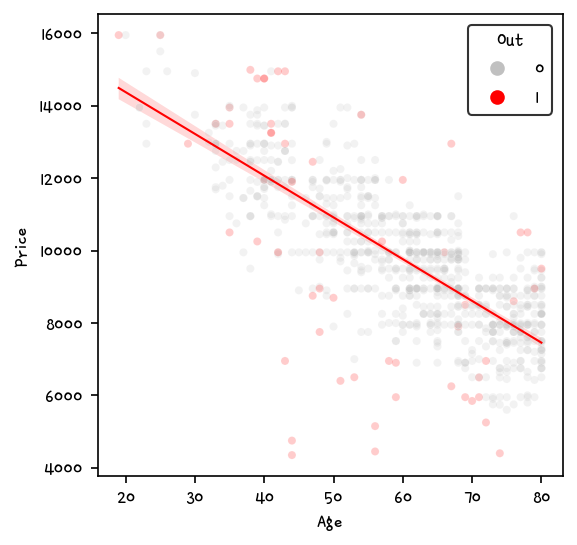

In [44]:
sns.regplot(
    data = trSetX, x = 'Age', y = trReal, 
    scatter_kws = {'color': '1'},
    line_kws = {'color': 'red', 'lw': 1}
)

sns.scatterplot(
    data = trSetX, x = 'Age', y = trReal, 
    hue = 'Out', s = 15, alpha = 0.2, 
    hue_order = ['0', '1'], 
    palette = ['silver', 'red']
);

In [45]:
trSetX['Out'].value_counts()

0    818
1     57
Name: Out, dtype: int64

In [46]:
outs = trSetX[trSetX['Out'].eq('1')].index
outs

Int64Index([  65,  862,   40,   19,  458,  893,  206, 1170,  728,  486,  870,
             222,  641,  181, 1211,   90,  380,   46,  439,  903,  759, 1249,
              35,  178,  100,  892,   22,  218,  205,   96,  107,  213,   26,
             237,    7,   29,  411,  437,  282,  227,  426,  120, 1160,  891,
             860,  967, 1191,  197,   24,   41,  287, 1246,  889,   23,  169,
             611,   28],
           dtype='int64')

In [47]:
trSetX = trSetX.drop(index = outs, columns = ['Out'])
trReal = trReal.drop(index = outs)

In [48]:
fit2 = ols(y = trReal, X = trSetX)

In [49]:
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     426.9
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          8.51e-267
Time:                        11:12:29   Log-Likelihood:                -6696.8
No. Observations:                 818   AIC:                         1.341e+04
Df Residuals:                     810   BIC:                         1.345e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3432.0746   2083.542     -1.647      0.100   -7521.853     657.704
Age          -95.4639      2.581    -36.992      0.000    -100.529     -90.398
KM            -0.0156      0.001    -13.317      0.000      -0.018      -0.013
HP             1.8192      4.414      0.412      0.680      -6.846      10.484
MetColor      -7.5377     65.265     -0.115      0.908    -135.646     120.571
Doors         28.8330     41.435      0.696      0.487     -52.499     110.165
Weight        17.6152      2.089      8.434      0.000      13.516      21.715
Petrol      1195.3627    304.186      3.930      0.000     598.278    1792.448
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                1.048
Skew:                           0.039   Prob(JB):                        0.592
Kurtosis:                       2.843   Cond. No.                     5.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
hds.breushpagan(fit2)

,Statistic,P-Value,F-Value,F P-Value
0,8.366,0.301,1.196,0.303


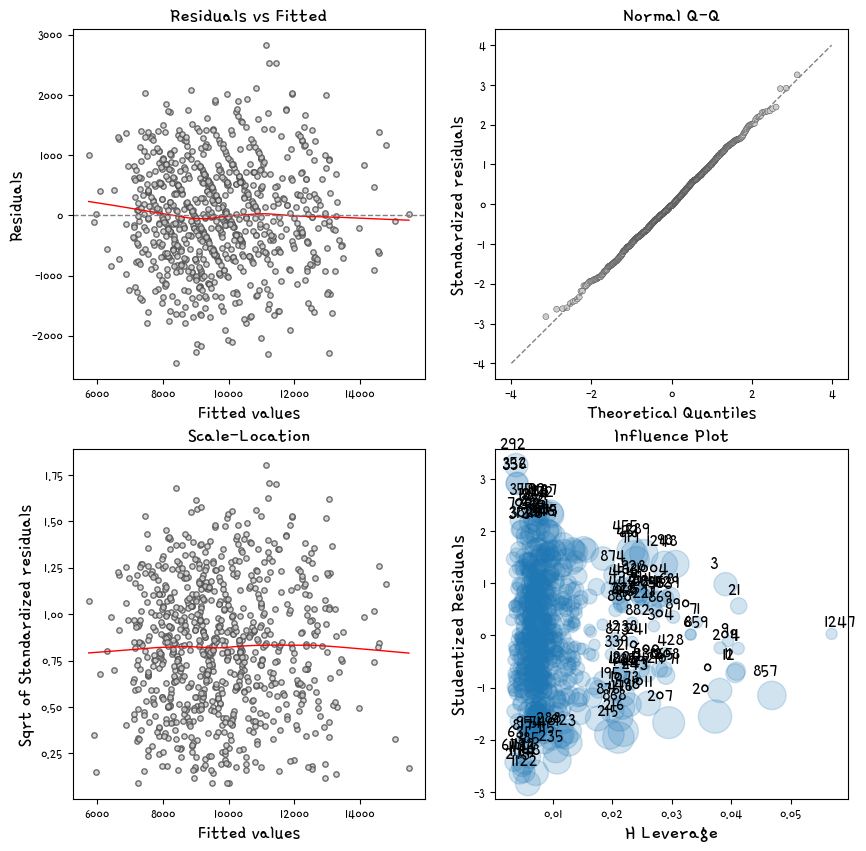

In [51]:
hds.regressionDiagnosis(fit2)

In [52]:
stats.shapiro(fit2.resid)

ShapiroResult(statistic=0.998685896396637, pvalue=0.818629264831543)

In [53]:
values = ['Diesel', 'Petrol']

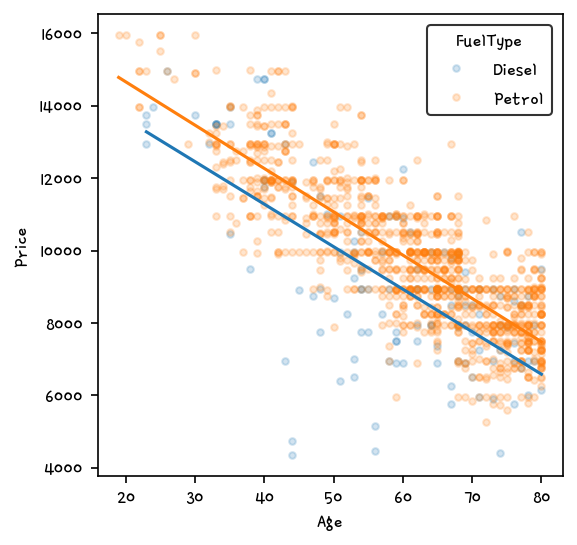

In [55]:
for i, v in enumerate(values):
    sns.regplot(data = df[df['Petrol'].eq(i)],
                x = 'Age', 
                y = 'Price', 
                ci = None, 
                label = v, 
                scatter_kws = dict(s = 10, alpha = 0.2),
                line_kws = dict(lw = 1.5))
plt.legend(loc = 'best', title = 'FuelType');

In [56]:
trPred1 = fit1.predict(trSetX)
trPred2 = fit2.predict(trSetX)

In [60]:
pd.DataFrame(data = {
    'Real': trReal,
    'Pred1': trPred1, 
    'Pred2': trPred2,
    'Err1': trReal - trPred1, 
    'Err2': trReal - trPred2, 
})

,Real,Pred1,Pred2,Err1,Err2
1116,9950,8212.688,8226.682,1737.312,1723.318
412,9950,10436.103,10394.200,-486.103,-444.200
1210,8950,9550.133,9514.326,-600.133,-564.326
1219,8500,7485.488,7515.104,1014.512,984.896
272,11450,9529.456,9572.012,1920.544,1877.988
...,...,...,...,...,...
763,7750,8545.952,8566.167,-795.952,-816.167
835,10900,10344.563,10345.163,555.437,554.837
1216,8250,9772.273,9756.644,-1522.273,-1506.644
559,8950,9540.717,9520.295,-590.717,-570.295


In [58]:
tePred1 = fit1.predict(teSetX)
tePred2 = fit2.predict(teSetX)

In [59]:
pd.DataFrame(data = {
    'Real': teReal,
    'Pred1': tePred1, 
    'Pred2': tePred2
})

,Real,Pred1,Pred2
711,8250,8800.801,8845.335
898,6500,6284.139,6466.255
186,14350,11924.453,11947.344
867,6500,6801.433,6950.609
18,14900,14557.039,14479.869
...,...,...,...
881,7950,7299.861,7417.891
367,12950,11563.425,11546.141
608,8950,9845.690,9854.446
968,8750,8101.975,8135.850


In [61]:
hds.regmetrics(y_true = trReal, y_pred = trPred1)

,MSE,RMSE,RMSLE,MAE,MAPE
0,758864.051,871.128,0.093,700.061,0.075


In [62]:
hds.regmetrics(y_true = trReal, y_pred = trPred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,755913.113,869.433,0.093,697.674,0.075


In [63]:
hds.regmetrics(y_true = teReal, y_pred = tePred1)

,MSE,RMSE,RMSLE,MAE,MAPE
0,928775.181,963.73,0.105,759.234,0.081


In [64]:
hds.regmetrics(y_true = teReal, y_pred = tePred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,914505.621,956.298,0.103,754.909,0.081


In [65]:
from sklearn import metrics

In [66]:
metrics.mean_squared_error(y_true = teReal, y_pred = tePred2)

914505.621

In [67]:
metrics.mean_squared_error(y_true = teReal, y_pred = tePred2) ** (1/2)

956.298

In [68]:
metrics.mean_squared_log_error(y_true = teReal, y_pred = tePred2) ** (1/2)

0.103

In [69]:
metrics.mean_absolute_error(y_true = teReal, y_pred = tePred2)

754.909

In [70]:
metrics.mean_absolute_percentage_error(y_true = teReal, y_pred = tePred2)

0.081

In [71]:
def reg_metrics(y_true, y_pred):
    mse = metrics.mean_squared_error(y_true = y_true, y_pred = y_pred)
    rmse = metrics.mean_squared_error(y_true = y_true, y_pred = y_pred) ** (1/2)
    rmsle = metrics.mean_squared_log_error(y_true = y_true, y_pred = y_pred) ** (1/2)
    mae = metrics.mean_absolute_error(y_true = y_true, y_pred = y_pred)
    mape = metrics.mean_absolute_percentage_error(y_true = y_true, y_pred = y_pred)
    return pd.DataFrame(data = {
        'MSE': mse, 'RMSE': rmse, 'RMSLE': rmsle, 'MAE': mae, 'MAPE': mape
    }, index = [0])

In [72]:
reg_metrics(y_true = trReal, y_pred = trPred1)

,MSE,RMSE,RMSLE,MAE,MAPE
0,758864.051,871.128,0.093,700.061,0.075


In [73]:
hds.vif(trSetX)

,Age,KM,HP,MetColor,Doors,Weight,Petrol
0,1.278,1.525,3.117,1.015,1.668,4.661,6.113


In [74]:
trSetX1 = trSetX.drop(columns = ['Petrol'])

In [75]:
hds.vif(trSetX1)

,Age,KM,HP,MetColor,Doors,Weight
0,1.261,1.425,1.146,1.011,1.337,1.504


In [76]:
fit3 = hds.stepwise(y = trReal, X = trSetX, direction = 'both')

In [77]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     749.3
Date:                Wed, 26 Oct 2022   Prob (F-statistic):          6.39e-271
Time:                        13:33:29   Log-Likelihood:                -6697.1
No. Observations:                 818   AIC:                         1.340e+04
Df Residuals:                     813   BIC:                         1.343e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4457.5787   1447.801     -3.079      0.002   -7299.448   -1615.710
Age          -95.5644      2.569    -37.193      0.000    -100.608     -90.521
KM            -0.0156      0.001    -13.326      0.000      -0.018      -0.013
Weight        18.7371      1.249     14.997      0.000      16.285      21.189
Petrol      1339.1472    169.036      7.922      0.000    1007.348    1670.946
==============================================================================
Omnibus:                        1.064   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                1.125
Skew:                           0.045   Prob(JB):                        0.570
Kurtosis:                       2.843   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
hds.breushpagan(fit3)

,Statistic,P-Value,F-Value,F P-Value
0,2.377,0.667,0.592,0.668


In [79]:
fit3.params

Intercept   -4457.579
Age           -95.564
KM             -0.016
Weight         18.737
Petrol       1339.147
dtype: float64

In [80]:
beta_z = hds.std_coefs(fit3)
beta_z

Intercept   -0.000
Age         -0.680
KM          -0.266
Weight       0.314
Petrol       0.177
dtype: float64

In [81]:
beta_z.abs().sort_values()

Intercept    0.000
Petrol       0.177
KM           0.266
Weight       0.314
Age          0.680
dtype: float64

In [82]:
tePred3 = fit3.predict(teSetX)

In [83]:
hds.regmetrics(y_true = teReal, y_pred = tePred3)

,MSE,RMSE,RMSLE,MAE,MAPE
0,911188.631,954.562,0.103,751.766,0.08


In [84]:
hds.regmetrics(y_true = teReal, y_pred = tePred2)

,MSE,RMSE,RMSLE,MAE,MAPE
0,914505.621,956.298,0.103,754.909,0.081
